In [ ]:
import os

reports_dir = 'reports'
reports = {}

for filename in os.listdir(reports_dir):
    if filename.endswith('.txt'):  # Assuming reports are stored as .txt files
        with open(os.path.join(reports_dir, filename), 'r') as file:
            reports[filename] = file.read()

xgb_report = reports.get('xgb_report.txt', '')
lgb_report = reports.get('lgb_report.txt', '')
knn_report = reports.get('knn_report.txt', '')
svm_report = reports.get('svm_report.txt', '')
rf_report = reports.get('rf_report.txt', '')
gin_report = reports.get('gin_report.txt', '')
gcnp_report = reports.get('gcn+_report.txt', '')

/var/folders/s8/nkk529fn01b0jx_j9v5p5br40000gn/T/ipykernel_6588/2390237437.py:84: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[3].set_xticklabels(labels)


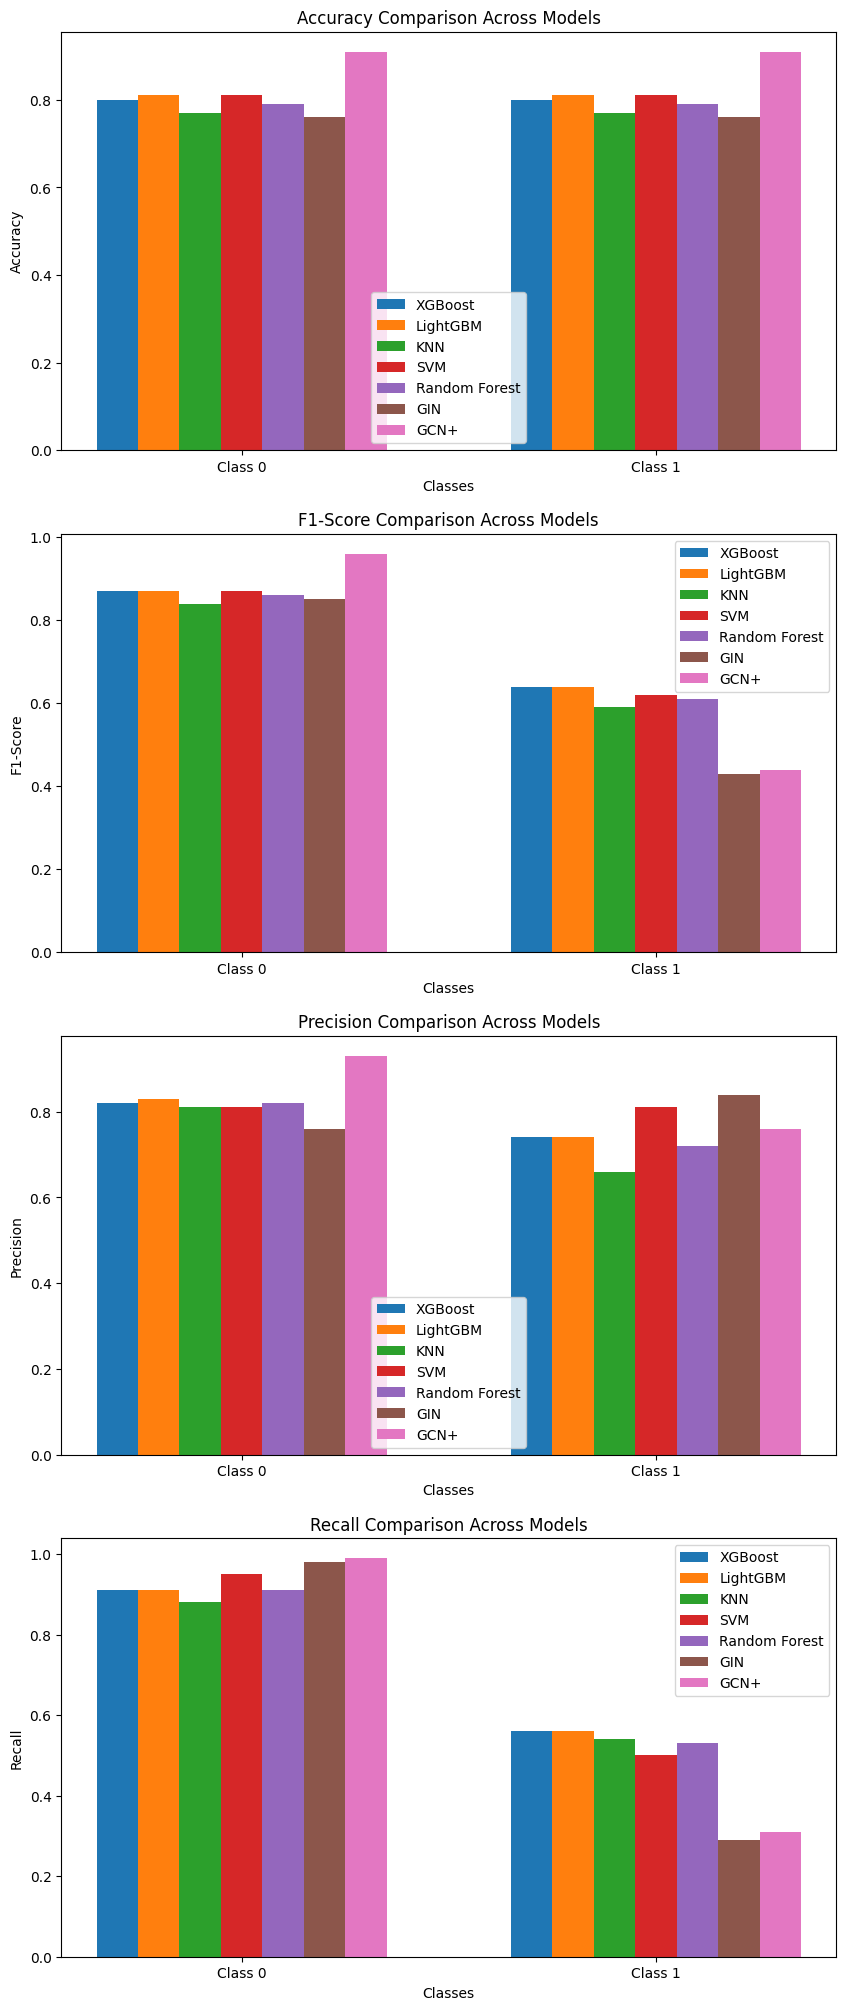

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def parse_metrics(report):
    lines = report.split('\n')
    metrics = {'precision': [], 'recall': [], 'f1-score': [], 'accuracy': None}
    for line in lines[2:4]:  # Extract metrics for Class 0 and Class 1
        values = line.split()
        metrics['precision'].append(float(values[1]))
        metrics['recall'].append(float(values[2]))
        metrics['f1-score'].append(float(values[3]))
    for line in lines:
        if 'accuracy' in line:
            metrics['accuracy'] = float(line.split()[1])
            break
    return metrics

xgb_metrics = parse_metrics(xgb_report)
lgb_metrics = parse_metrics(lgb_report)
knn_metrics = parse_metrics(knn_report)
svm_metrics = parse_metrics(svm_report)
random_forest_metrics = parse_metrics(rf_report)
gin_metrics = parse_metrics(gin_report)
gcnp_metrics = parse_metrics(gcnp_report)

labels = ['Class 0', 'Class 1']
x = np.arange(len(labels))
width = 0.1

fig, ax = plt.subplots(4, 1, figsize=(10, 25))

ax[0].bar(x - 3*width, xgb_metrics['accuracy'], width, label='XGBoost')
ax[0].bar(x - 2*width, lgb_metrics['accuracy'], width, label='LightGBM')
ax[0].bar(x - width, knn_metrics['accuracy'], width, label='KNN')
ax[0].bar(x, svm_metrics['accuracy'], width, label='SVM')
ax[0].bar(x + width, random_forest_metrics['accuracy'], width, label='Random Forest')
ax[0].bar(x + 2*width, gin_metrics['accuracy'], width, label='GIN')
ax[0].bar(x + 3*width, gcnp_metrics['accuracy'], width, label='GCN+')
ax[0].set_xlabel('Classes')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy Comparison Across Models')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].legend()

ax[1].bar(x - 3*width, xgb_metrics['f1-score'], width, label='XGBoost')
ax[1].bar(x - 2*width, lgb_metrics['f1-score'], width, label='LightGBM')
ax[1].bar(x - width, knn_metrics['f1-score'], width, label='KNN')
ax[1].bar(x, svm_metrics['f1-score'], width, label='SVM')
ax[1].bar(x + width, random_forest_metrics['f1-score'], width, label='Random Forest')
ax[1].bar(x + 2*width, gin_metrics['f1-score'], width, label='GIN')
ax[1].bar(x + 3*width, gcnp_metrics['f1-score'], width, label='GCN+')
ax[1].set_xlabel('Classes')
ax[1].set_ylabel('F1-Score')
ax[1].set_title('F1-Score Comparison Across Models')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].legend()

ax[2].bar(x - 3*width, xgb_metrics['precision'], width, label='XGBoost')
ax[2].bar(x - 2*width, lgb_metrics['precision'], width, label='LightGBM')
ax[2].bar(x - width, knn_metrics['precision'], width, label='KNN')
ax[2].bar(x, svm_metrics['precision'], width, label='SVM')
ax[2].bar(x + width, random_forest_metrics['precision'], width, label='Random Forest')
ax[2].bar(x + 2*width, gin_metrics['precision'], width, label='GIN')
ax[2].bar(x + 3*width, gcnp_metrics['precision'], width, label='GCN+')
ax[2].set_xlabel('Classes')
ax[2].set_ylabel('Precision')
ax[2].set_title('Precision Comparison Across Models')
ax[2].set_xticks(x)
ax[2].set_xticklabels(labels)
ax[2].legend()

ax[3].bar(x - 3*width, xgb_metrics['recall'], width, label='XGBoost')
ax[3].bar(x - 2*width, lgb_metrics['recall'], width, label='LightGBM')
ax[3].bar(x - width, knn_metrics['recall'], width, label='KNN')
ax[3].bar(x, svm_metrics['recall'], width, label='SVM')
ax[3].bar(x + width, random_forest_metrics['recall'], width, label='Random Forest')
ax[3].bar(x + 2*width, gin_metrics['recall'], width, label='GIN')
ax[3].bar(x + 3*width, gcnp_metrics['recall'], width, label='GCN+')
ax[3].set_xlabel('Classes')
ax[3].set_ylabel('Recall')
ax[3].set_title('Recall Comparison Across Models')
ax[3].set_xticklabels(labels)
ax[3].set_xticks(x)
ax[3].legend()
plt.show()